In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
misssing_values = data.isnull()
print(misssing_values)

     CustomerID  Genre    Age  Annual Income (k$)  Spending Score (1-100)
0         False  False  False               False                   False
1         False  False  False               False                   False
2         False  False  False               False                   False
3         False  False  False               False                   False
4         False  False  False               False                   False
..          ...    ...    ...                 ...                     ...
195       False  False  False               False                   False
196       False  False  False               False                   False
197       False  False  False               False                   False
198       False  False  False               False                   False
199       False  False  False               False                   False

[200 rows x 5 columns]


In [6]:
duplicates = data.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


In [8]:
#Here i am performing one-hot encoding technique in my categorical data colume i.e. "genre"

df_encoded = pd.DataFrame(data)

label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Display the encoded DataFrame
print(df_encoded)
 

     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      1   19                  15                      39
1             2      1   21                  15                      81
2             3      0   20                  16                       6
3             4      0   23                  16                      77
4             5      0   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      0   35                 120                      79
196         197      0   45                 126                      28
197         198      1   32                 126                      74
198         199      1   32                 137                      18
199         200      1   30                 137                      83

[200 rows x 5 columns]


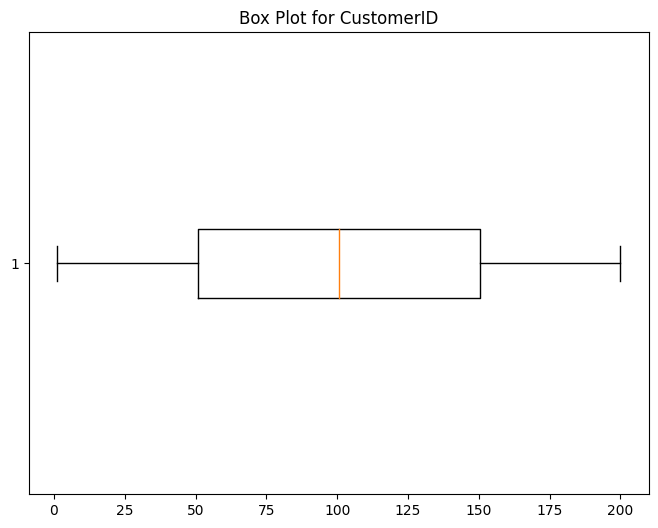

count    200.000000
mean     100.500000
std       57.879185
min        1.000000
25%       50.750000
50%      100.500000
75%      150.250000
max      200.000000
Name: CustomerID, dtype: float64
Potential outliers in CustomerID:
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


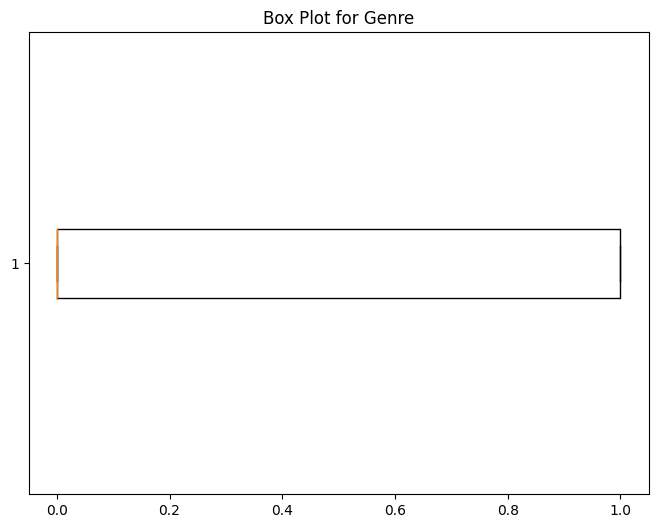

count    200.000000
mean       0.440000
std        0.497633
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Genre, dtype: float64
Potential outliers in Genre:
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


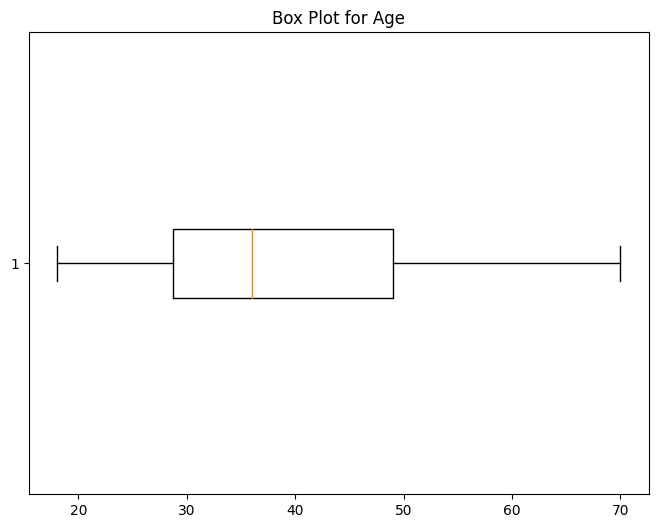

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64
Potential outliers in Age:
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


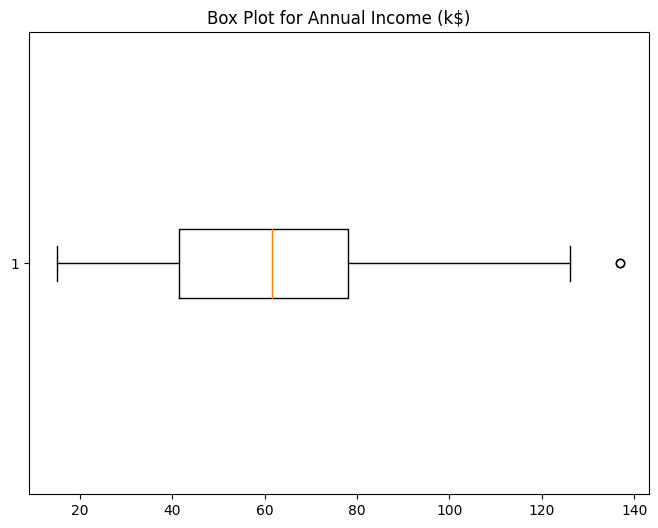

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64
Potential outliers in Annual Income (k$):
     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
198         199      1   32                 137                      18
199         200      1   30                 137                      83


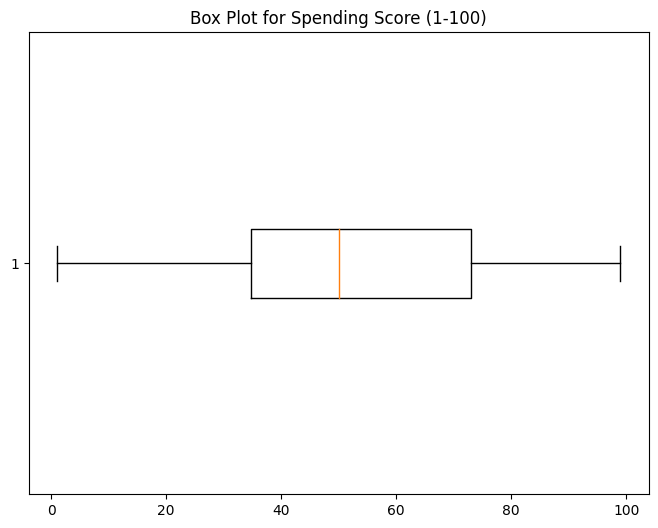

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64
Potential outliers in Spending Score (1-100):
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [9]:
#detecting outliers
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (replace with your own dataset)

# Create a DataFrame from the data
df = pd.DataFrame(df_encoded)

# Iterate over numeric columns
for column_name in df.select_dtypes(include=['number']).columns:
    # To visualize potential outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column_name], vert=False)
    plt.title(f'Box Plot for {column_name}')
    plt.show()

    summary_stats = df[column_name].describe()
    print(summary_stats)

    # Function to detect potential outliers using the IQR method
    def detect_outliers_iqr(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (data < lower_bound) | (data > upper_bound)

    # Detect and print potential outliers using the IQR method
    outliers = detect_outliers_iqr(df[column_name])
    potential_outliers = df[outliers]
    print(f"Potential outliers in {column_name}:")
    print(potential_outliers)


In [38]:
#here i am performing feature scaling
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Sample dataset (replace with your own dataset)


# # Create a DataFrame from the data
# df = pd.DataFrame(df_encoded)

# # Standardization (Z-score normalization)
# scaler_standard = StandardScaler()
# standardized_data = scaler_standard.fit_transform(df)

# # Min-Max Scaling
# scaler_minmax = MinMaxScaler()
# minmax_scaled_data = scaler_minmax.fit_transform(df)

# # Create DataFrames from the scaled data (for visualization or further analysis)
# standardized_df = pd.DataFrame(standardized_data, columns=df.columns)
# minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=df.columns)

# # Print the scaled DataFrames
# print("Standardized Data (Z-score normalization):\n")
# print(standardized_df)

# print("\nMin-Max Scaled Data:\n")
# print(minmax_scaled_df)


Standardized Data (Z-score normalization):

     CustomerID     Genre       Age  Annual Income (k$)  \
0     -1.723412  1.128152 -1.424569           -1.738999   
1     -1.706091  1.128152 -1.281035           -1.738999   
2     -1.688771 -0.886405 -1.352802           -1.700830   
3     -1.671450 -0.886405 -1.137502           -1.700830   
4     -1.654129 -0.886405 -0.563369           -1.662660   
..          ...       ...       ...                 ...   
195    1.654129 -0.886405 -0.276302            2.268791   
196    1.671450 -0.886405  0.441365            2.497807   
197    1.688771  1.128152 -0.491602            2.497807   
198    1.706091  1.128152 -0.491602            2.917671   
199    1.723412  1.128152 -0.635135            2.917671   

     Spending Score (1-100)  
0                 -0.434801  
1                  1.195704  
2                 -1.715913  
3                  1.040418  
4                 -0.395980  
..                      ...  
195                1.118061  
196    

Skewness values for each feature:

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Skewed features (abs(skewness) > 0.50):

Series([], dtype: float64)


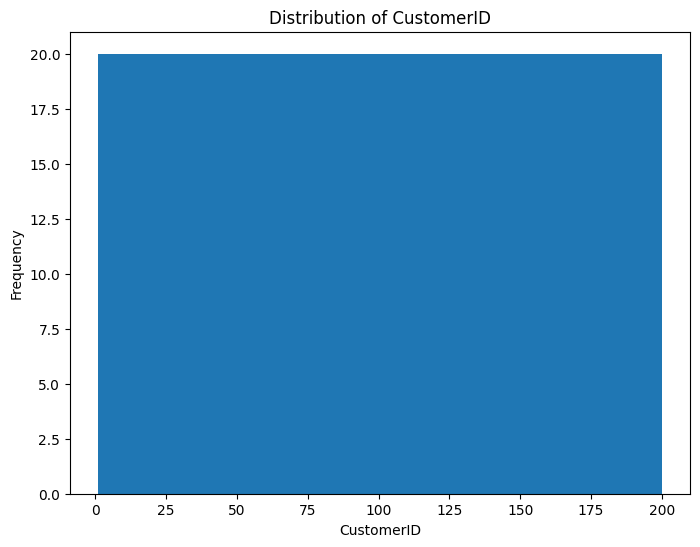

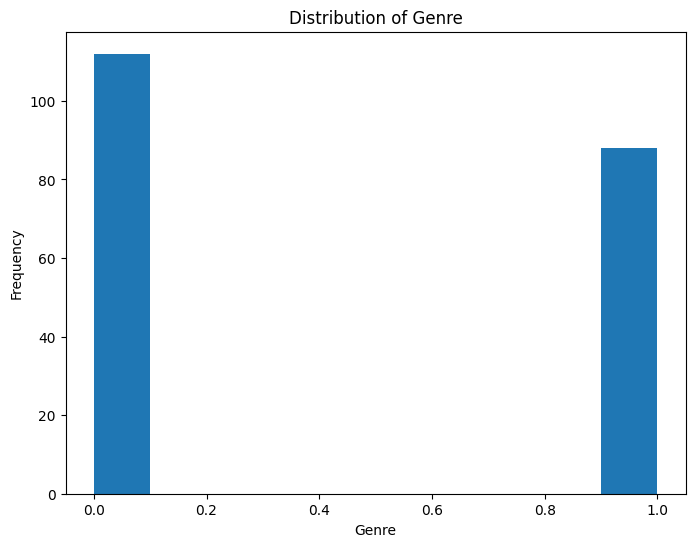

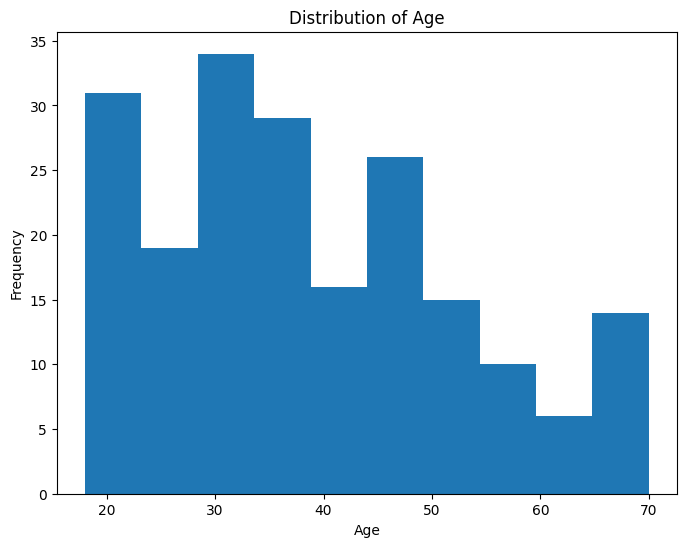

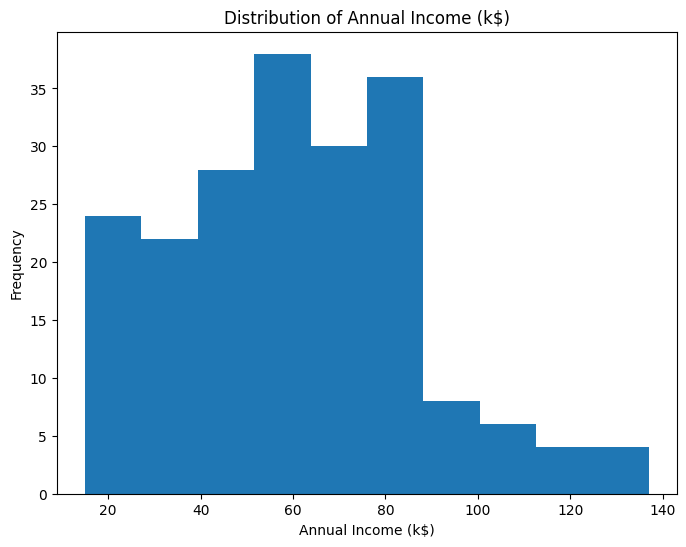

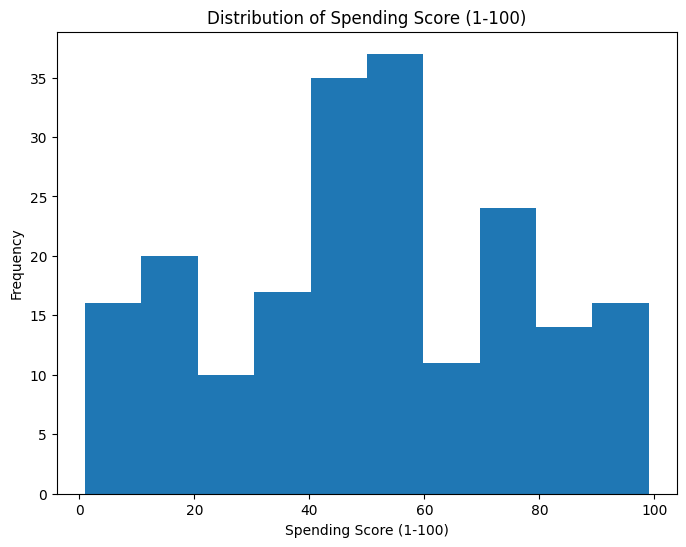

In [12]:
#checking skewness
import pandas as pd
import matplotlib.pyplot as plt



# Create a DataFrame from the data
df = pd.DataFrame(df_encoded)

# Calculate skewness for each numeric feature
skewness = df.apply(lambda x: x.skew())

# Set a threshold for skewness (you can adjust this threshold)
skewness_threshold = 0.5

# Identify skewed features
skewed_features = skewness[abs(skewness) > skewness_threshold]

# Print skewness values and identify skewed features
print("Skewness values for each feature:\n")
print(skewness)

print("\nSkewed features (abs(skewness) > {:.2f}):\n".format(skewness_threshold))
print(skewed_features)

# Visualize the distribution of each feature
for feature_name in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature_name], bins=10)  # You can adjust the number of bins
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()


Skewness values for each feature:

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Skewness values after transformations:

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


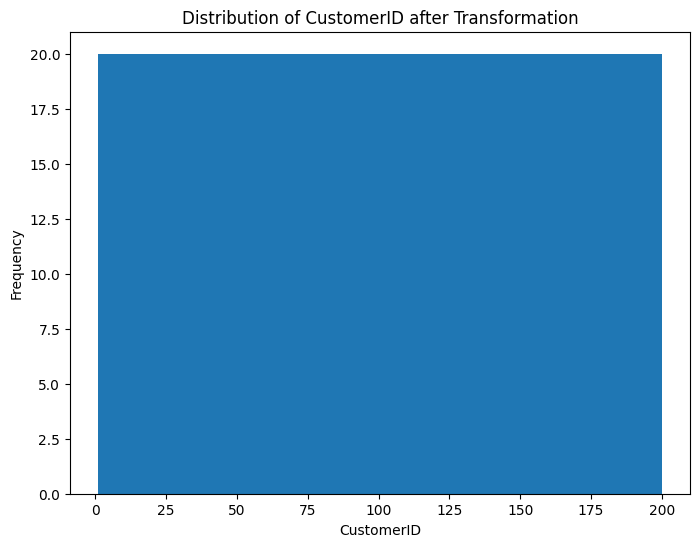

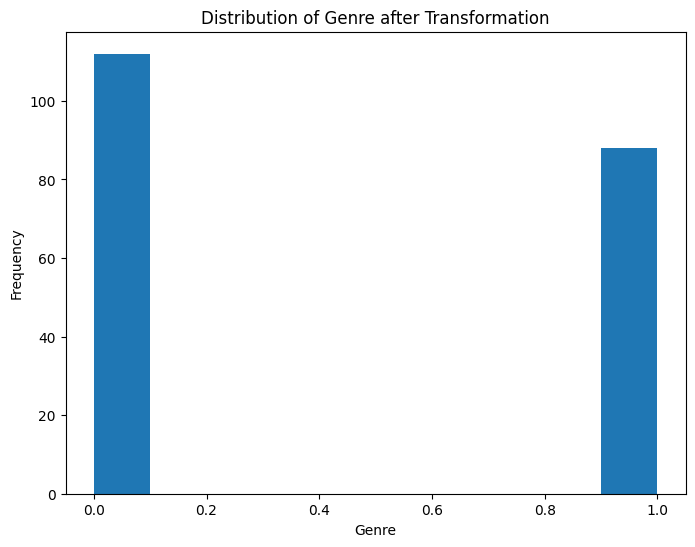

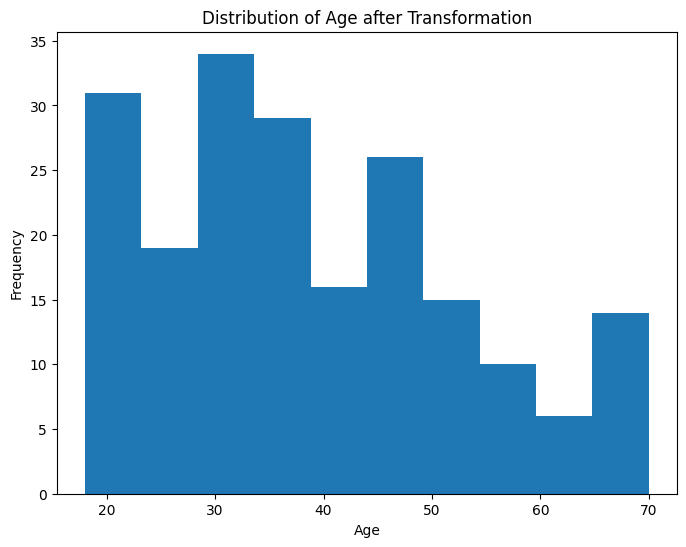

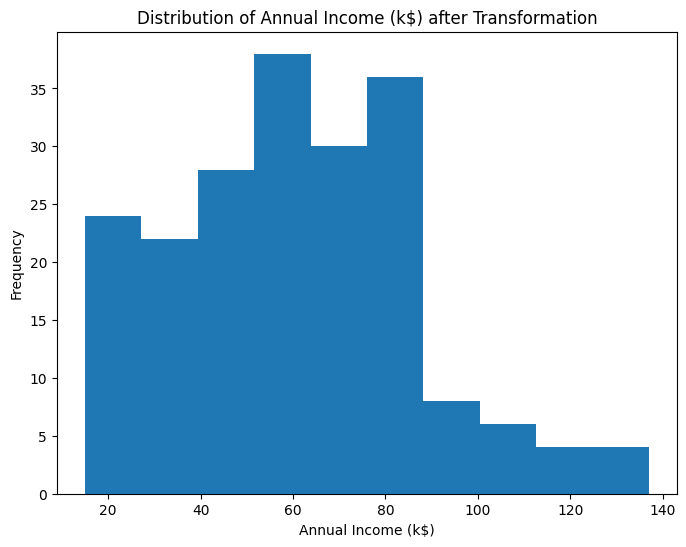

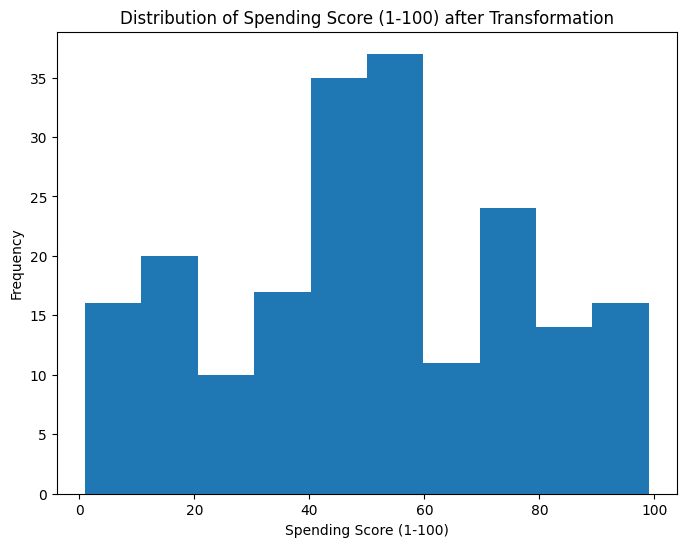

In [13]:
import pandas as pd
import numpy as np


# Create a DataFrame from the data
df = pd.DataFrame(df_encoded)

# Calculate skewness for each numeric feature
skewness = df.apply(lambda x: x.skew())

# Print skewness values
print("Skewness values for each feature:\n")
print(skewness)

# Set a threshold for skewness (you can adjust this threshold)
skewness_threshold = 0.5

# Identify positively skewed features
positively_skewed_features = skewness[skewness > skewness_threshold].index

# Identify negatively skewed features
negatively_skewed_features = skewness[skewness < -skewness_threshold].index

# Apply log transformation to positively skewed features
for feature in positively_skewed_features:
    df[feature] = np.log1p(df[feature])

# Apply square root transformation to negatively skewed features
for feature in negatively_skewed_features:
    df[feature] = np.sqrt(df[feature])

# Calculate skewness again after transformations
skewness_after = df.apply(lambda x: x.skew())

# Print skewness values after transformations
print("\nSkewness values after transformations:\n")
print(skewness_after)

import matplotlib.pyplot as plt

# Visualize the data distribution after skewness transformations
for feature_name in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature_name], bins=10)  # You can adjust the number of bins
    plt.title(f'Distribution of {feature_name} after Transformation')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


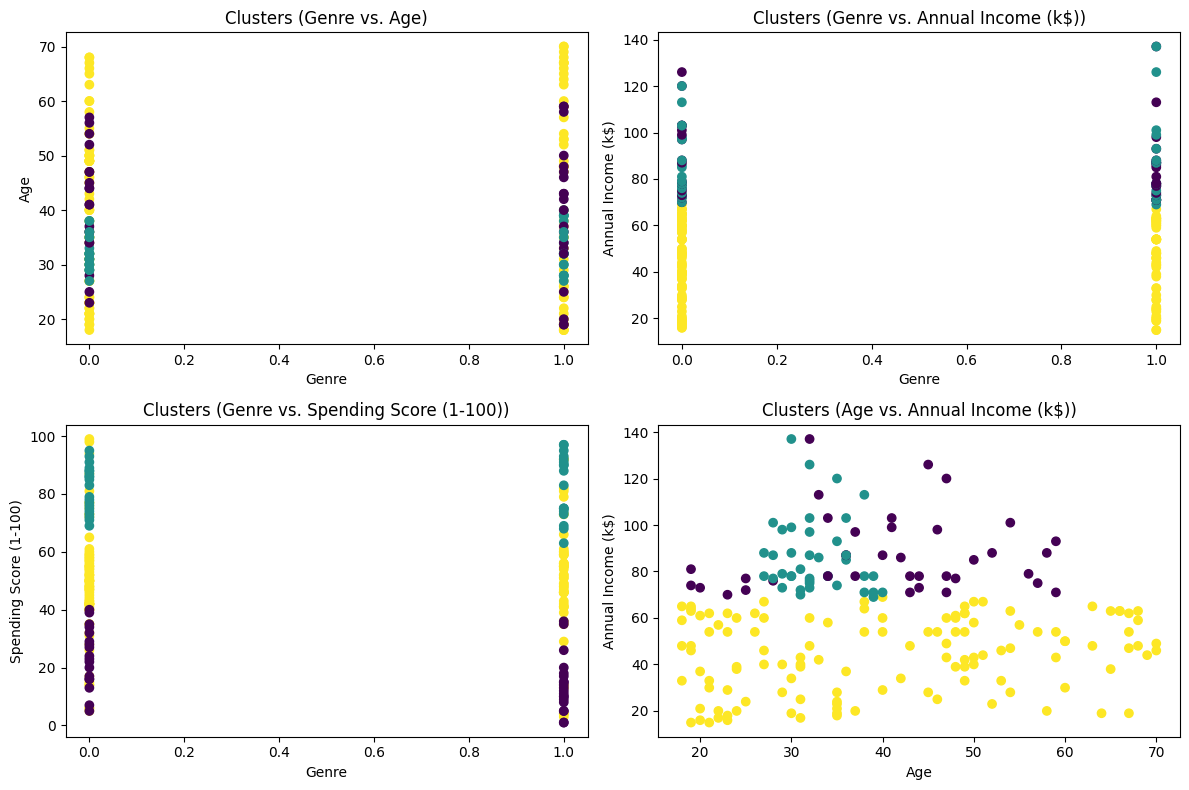

Cluster Centers (Centroids):

[[ 0.52631579 40.39473684 87.         18.63157895]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.40650407 40.32520325 44.15447154 49.82926829]]

Cluster Assignments for Data Points:

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [15]:
#k mean clustering algorithm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Create a DataFrame from the data
df = pd.DataFrame(df_encoded)

# Encode the 'Genre' column to numerical values
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

# Select columns for clustering (excluding 'CustomerID' for this example)
selected_columns = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[selected_columns]

# Specify the number of clusters (K)
k = 3

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Visualize the clusters (pairwise features)
# Visualize the clusters (pairwise features)
plt.figure(figsize=(12, 8))
subplot_num = 1  # Initialize the subplot number

for i in range(len(selected_columns)):
    for j in range(i+1, len(selected_columns)):
        if subplot_num <= 4:  # Limit the number of subplots to 4
            plt.subplot(2, 2, subplot_num)
            plt.scatter(df[selected_columns[i]], df[selected_columns[j]], c=cluster_labels, cmap='viridis')
            plt.xlabel(selected_columns[i])
            plt.ylabel(selected_columns[j])
            plt.title(f'Clusters ({selected_columns[i]} vs. {selected_columns[j]})')
            subplot_num += 1

plt.tight_layout()
plt.show()


# Print the cluster centers
print("Cluster Centers (Centroids):\n")
print(kmeans.cluster_centers_)

# Print the cluster assignments for each data point
print("\nCluster Assignments for Data Points:\n")
print(cluster_labels)


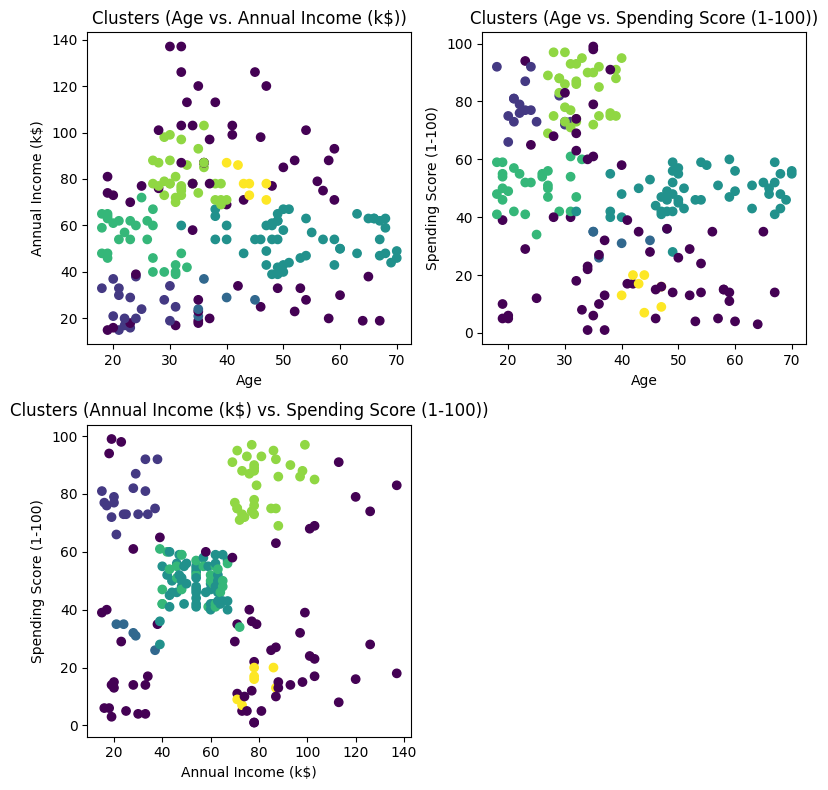


Cluster Assignments for Data Points:

0     -1
1      0
2     -1
3      0
4     -1
      ..
195   -1
196   -1
197   -1
198   -1
199   -1
Name: Cluster, Length: 200, dtype: int64


In [21]:
#DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Create a DataFrame from your data (replace df_encoded with your data)
df = pd.DataFrame(df_encoded)

# Select columns for clustering (excluding 'CustomerID' for this example)
selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[selected_columns]

# Standardize the feature columns (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the DBSCAN model
eps = 0.5  # Radius within which to search for nearby points
min_samples = 5  # Minimum number of points required to form a dense region
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

# Add the cluster labels to the DataFrame
df['Cluster'] = dbscan.labels_

# Visualize the clusters (pairwise features)
plt.figure(figsize=(12, 8))
for i in range(len(selected_columns)):
    for j in range(i + 1, len(selected_columns)):
        plt.subplot(2, 3, (i * 3 + j - i))  # Fix subplot numbering
        plt.scatter(df[selected_columns[i]], df[selected_columns[j]], c=df['Cluster'], cmap='viridis')
        plt.xlabel(selected_columns[i])
        plt.ylabel(selected_columns[j])
        plt.title(f'Clusters ({selected_columns[i]} vs. {selected_columns[j]})')
plt.tight_layout()
plt.show()

# Print the cluster assignments for each data point (-1 represents noise/outliers)
print("\nCluster Assignments for Data Points:\n")
print(df['Cluster'])
